In [1]:
import bs4
from bs4 import BeautifulSoup
import numpy as n
import pandas as pd
from os import path

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests

In [2]:
file = open("blogpage.html", "r")
blogtext = file.read()
blogtext

'<html>\n<head>\n<script> var x = 22; var y = 99; print(x,y) </script>\n</head>\n<body>\n<h1 style="text-align: center;">The Best Artificial Intelligence Blogs</h1>\n<h2>OpenAI</h2>\n<p>The AI researchers at the non-profit AI research company OpenAI are working hard to help us all understand the power of AI as well as the issues that society must work through on this fascinating topic. An important nuance, they seek to enact the path to safe artificial general intelligence.</p>\n<p>For more see: <a href="https://openai.com/" target="_blank" rel="nofollow">OpenAI.com</a></p>\n<h2>The a16z AI Playbook</h2>\n<p>This is not as frequently updated as a blog but it is such a tremendous resource it belongs high on our list. They bring insights on AI topics with a special focus on the creators who are building AI solutions.</p>\n<p>For more see: <a href="http://aiplaybook.a16z.com/" target="_blank" rel="nofollow">The a16z AI Playbook</a></p>\n<h2>Artificial Intelligence Blog</h2>\n<p>They cover

In [3]:
import re

In [4]:
#romeve the <script>
def cleanscripts(raw_html):
  cleaner = re.compile('<s.+?script>')
  cleantext = re.sub(cleaner, '', raw_html)
  return cleantext

blogtext = cleanscripts(blogtext)
blogtext

'<html>\n<head>\n\n</head>\n<body>\n<h1 style="text-align: center;">The Best Artificial Intelligence Blogs</h1>\n<h2>OpenAI</h2>\n<p>The AI researchers at the non-profit AI research company OpenAI are working hard to help us all understand the power of AI as well as the issues that society must work through on this fascinating topic. An important nuance, they seek to enact the path to safe artificial general intelligence.</p>\n<p>For more see: <a href="https://openai.com/" target="_blank" rel="nofollow">OpenAI.com</a></p>\n<h2>The a16z AI Playbook</h2>\n<p>This is not as frequently updated as a blog but it is such a tremendous resource it belongs high on our list. They bring insights on AI topics with a special focus on the creators who are building AI solutions.</p>\n<p>For more see: <a href="http://aiplaybook.a16z.com/" target="_blank" rel="nofollow">The a16z AI Playbook</a></p>\n<h2>Artificial Intelligence Blog</h2>\n<p>They cover AI news, research, books, and thought leaders in the

In [5]:
#romeve all the tags
def cleantags(raw_html):
  cleaner = re.compile('<.*?>')
  cleantext = re.sub(cleaner, '', raw_html)
  return cleantext

blogtext = cleantags(blogtext)
blogtext

'\n\n\n\n\nThe Best Artificial Intelligence Blogs\nOpenAI\nThe AI researchers at the non-profit AI research company OpenAI are working hard to help us all understand the power of AI as well as the issues that society must work through on this fascinating topic. An important nuance, they seek to enact the path to safe artificial general intelligence.\nFor more see: OpenAI.com\nThe a16z AI Playbook\nThis is not as frequently updated as a blog but it is such a tremendous resource it belongs high on our list. They bring insights on AI topics with a special focus on the creators who are building AI solutions.\nFor more see: The a16z AI Playbook\nArtificial Intelligence Blog\nThey cover AI news, research, books, and thought leaders in the industry. Track for insights into companies and conferences as well.\nFor more see: Artificial-Intelligence.blog\nMachine Learning Mastery\nDr. Jason Browlee is a respected practitoner and master of machine learning and he writes for others seeking to reall

In [6]:
#clean "\n"
def cleann(raw_html):
  cleaner = re.compile('\n')
  cleantext = re.sub(cleaner, '', raw_html)
  return cleantext

blogtext = cleann(blogtext)
blogtext

'The Best Artificial Intelligence BlogsOpenAIThe AI researchers at the non-profit AI research company OpenAI are working hard to help us all understand the power of AI as well as the issues that society must work through on this fascinating topic. An important nuance, they seek to enact the path to safe artificial general intelligence.For more see: OpenAI.comThe a16z AI PlaybookThis is not as frequently updated as a blog but it is such a tremendous resource it belongs high on our list. They bring insights on AI topics with a special focus on the creators who are building AI solutions.For more see: The a16z AI PlaybookArtificial Intelligence BlogThey cover AI news, research, books, and thought leaders in the industry. Track for insights into companies and conferences as well.For more see: Artificial-Intelligence.blogMachine Learning MasteryDr. Jason Browlee is a respected practitoner and master of machine learning and he writes for others seeking to really excel at machine learning. Sin

In [7]:
#clean non-relevant words: for more see
def clean_not_relevant(raw_html):
  cleaner = re.compile('For more see:')
  cleantext = re.sub(cleaner, '', raw_html)
  return cleantext

blogtext = clean_not_relevant(blogtext)
blogtext

'The Best Artificial Intelligence BlogsOpenAIThe AI researchers at the non-profit AI research company OpenAI are working hard to help us all understand the power of AI as well as the issues that society must work through on this fascinating topic. An important nuance, they seek to enact the path to safe artificial general intelligence. OpenAI.comThe a16z AI PlaybookThis is not as frequently updated as a blog but it is such a tremendous resource it belongs high on our list. They bring insights on AI topics with a special focus on the creators who are building AI solutions. The a16z AI PlaybookArtificial Intelligence BlogThey cover AI news, research, books, and thought leaders in the industry. Track for insights into companies and conferences as well. Artificial-Intelligence.blogMachine Learning MasteryDr. Jason Browlee is a respected practitoner and master of machine learning and he writes for others seeking to really excel at machine learning. Since his focus is on the people who can r

In [8]:
soup = BeautifulSoup(blogtext, "lxml")
htmlwords = soup.get_text(strip=False)
print(htmlwords)

The Best Artificial Intelligence BlogsOpenAIThe AI researchers at the non-profit AI research company OpenAI are working hard to help us all understand the power of AI as well as the issues that society must work through on this fascinating topic. An important nuance, they seek to enact the path to safe artificial general intelligence. OpenAI.comThe a16z AI PlaybookThis is not as frequently updated as a blog but it is such a tremendous resource it belongs high on our list. They bring insights on AI topics with a special focus on the creators who are building AI solutions. The a16z AI PlaybookArtificial Intelligence BlogThey cover AI news, research, books, and thought leaders in the industry. Track for insights into companies and conferences as well. Artificial-Intelligence.blogMachine Learning MasteryDr. Jason Browlee is a respected practitoner and master of machine learning and he writes for others seeking to really excel at machine learning. Since his focus is on the people who can re

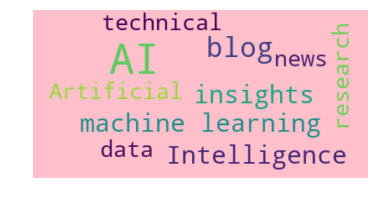

In [10]:
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="pink").generate(htmlwords)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()